# Differences in VIP & SST neural populations

In this notebook, we use various analyses to try to find out whether there are differences between VIP and SST neural populations and, if so, what these differences are. 
As we have already seen, the VIP and SST neural populations can be seen as an interplay or control system which, among other things, maintains the balance in the brain, so further analyses are very interesting (see also `vip_sst_neurons.md`).

## Import & Data Processing

In [1]:
# install dependencies

!pip install pandas --quiet
!pip install pyarrow 
!pip install seaborn --quiet
!pip install requests

   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.5 MB 13.4 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
# data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [4]:
# store the data as a pandas dataframe
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

In [5]:
# inspect the data 
# as we work with the pre processed file, the data only contains the vip and sst neural populations
pd.set_option("display.max_columns", None)
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,mean_running_speed,mean_pupil_area,response_latency,rewarded,ophys_experiment_id,imaging_depth,targeted_structure,cre_line,session_type,session_number,mouse_id,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
608354,2073,1086501538,"[0.01927158236503601, -0.05969213321805, 0.048...","[-1.2279815442797712, -1.1956662404829352, -1....",0.005364,0.003647,omitted,8,False,True,-0.060746,3569.258037,NaN,False,993862120,175,VISp,Vip-IRES-Cre,OPHYS_4_images_A,4.0,489066,993668836,991913246,993691759,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,129.0,novel
1231508,3728,1086567017,"[0.26466378569602966, 0.030856186524033546, 0....","[-1.2281906028244671, -1.1958697974869812, -1....",0.016521,0.024473,im054,5,True,False,3.738120,7910.495285,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1156834,741,1086557082,"[-0.044393379241228104, 0.0316426157951355, -0...","[-1.2281906028244671, -1.1958697974869812, -1....",-0.001479,-0.028631,omitted,8,False,True,0.157272,5058.335805,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1163201,996,1086567897,"[-0.04627765715122223, -0.05416109412908554, 0...","[-1.2281906028244671, -1.1958697974869812, -1....",0.195977,-0.023377,im035,7,True,False,-1.527644,6605.610394,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1214870,3063,1086556416,"[-0.007173431571573019, 0.07187602669000626, -...","[-1.2281906028244671, -1.1958697974869812, -1....",0.023096,-0.002332,im075,2,True,False,16.197693,7762.219840,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar


## How do VIP and SST neural populations differ in their responses to rewarded and non-rewarded stimuli?

As we already know, VIP and SST neurons fulfil different roles:
- VIP neurons are involved in disinhibition mechanisms, facilitating the activity of excitatory neurons in certain contexts, such as attention, learning, or reward processing.
- SST neurons, on the other hand, contribute to network stabilization by inhibiting pyramidal neurons, which suggests they may play a less direct role in reward processing.

Given these functional differences, we hypothesized that VIP neurons would exhibit stronger responses to rewarded stimuli compared to SST neurons. To test this, we analyze the mean neuronal response (mean_response) in rewarded `(rewarded=True)` and non-rewarded `(rewarded=False)` conditions for both populations.

In [6]:
# create two datasets, one for vip and one for sst
vip_data = data[data['cre_line'].str.contains('Vip')]
sst_data = data[data['cre_line'].str.contains('Sst')]

In [7]:
# for each group calculate the mean response to rewarded and non-rewarded stimuli along with the standard deviation and sample size
rewarded_vip = vip_data.groupby('rewarded')['mean_response'].agg(['mean', 'std', 'count']).reset_index()
rewarded_sst = sst_data.groupby('rewarded')['mean_response'].agg(['mean', 'std', 'count']).reset_index()

# standard error of the mean
def calculate_sem(row):
    return row['std'] / (row['count'] ** 0.5)

rewarded_vip['sem'] = rewarded_vip.apply(calculate_sem, axis=1)
rewarded_sst['sem'] = rewarded_sst.apply(calculate_sem, axis=1)

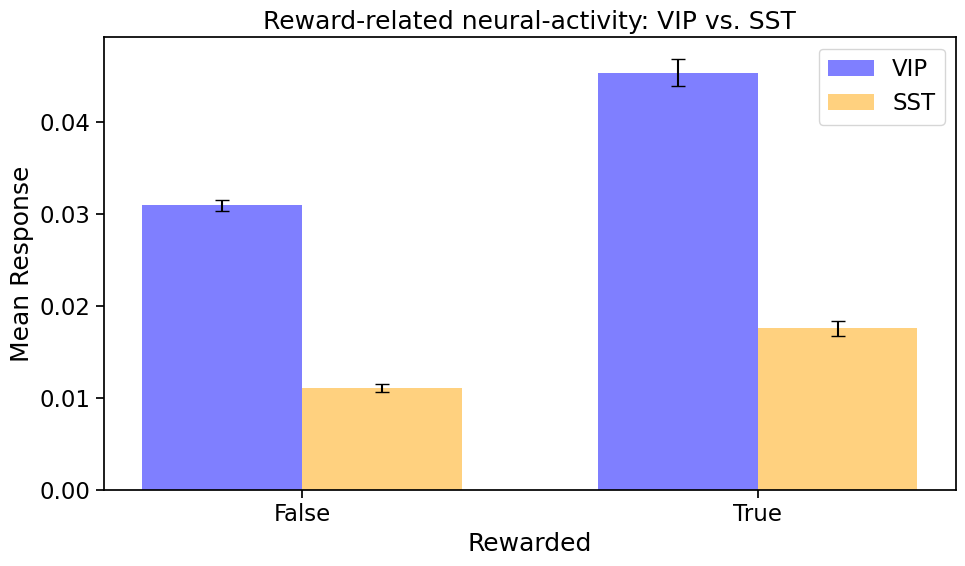

In [8]:
# visualize the reward-related neural activity
plt.figure(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(rewarded_vip['rewarded']))

# vip
plt.bar(x - bar_width/2, rewarded_vip['mean'], yerr=rewarded_vip['sem'], 
        width=bar_width, label='VIP', color='blue', alpha=0.5, capsize=5)

# ssi
plt.bar(x + bar_width/2, rewarded_sst['mean'], yerr=rewarded_sst['sem'], 
        width=bar_width, label='SST', color='orange', alpha=0.5, capsize=5)

plt.xlabel('Rewarded')
plt.ylabel('Mean Response')
plt.title('Reward-related neural-activity: VIP vs. SST')
plt.xticks(x, ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()

1. VIP neurons: They appear to show stronger modulation by the reward. This means that these neurons are sensitive to reward and may play a role in the processing of reward-related information.
2. SST neurons: They show a lower response to rewarded stimuli. This suggests that these neurons may be less directly involved in the processing of reward information or have a different functional role in the network.
3. The contrast between VIP and SST neurons underlines the possible specialisation of the two cell types. VIP neurons might react more sensitive to behavioural contexts with reward, SST neurons might react less sensitive, possibly more likely to play a role in inhibiting or stabilising the neuronal network.

## How do VIP and SST neural populations differ in their responses to change?

Furthermore, the neuronal response of VIP and SST neurons to a change of stimulus can be analyzed. 
Stimulus changes (e.g., switching an image or introducing a new visual pattern) are behaviorally important because they often indicate something new or relevant in the environment. By analyzing how these neural populations react to changes (`is_change=True`) versus no change (`is_change=False`), we can better understand their roles in processing unexpected or novel events.
- VIP neurons are known for their role in enhancing attention and amplifying responses to new or important stimuli. If VIP neurons respond more strongly to stimulus changes, it could indicate that they help the brain detect and focus on new information.
- SST neurons play a stabilizing role in brain circuits, often by suppressing unnecessary activity. Their response to stimulus changes might reflect how the brain balances excitation and inhibition when processing novelty.

In [9]:
# for each group calculate the mean response to change and no change stimuli along with the standard deviation and sample size
change_vip = vip_data.groupby('is_change')['mean_response'].agg(['mean', 'std', 'count']).reset_index()
change_sst = sst_data.groupby('is_change')['mean_response'].agg(['mean', 'std', 'count']).reset_index()

change_vip['sem'] = change_vip.apply(calculate_sem, axis=1)
change_sst['sem'] = change_sst.apply(calculate_sem, axis=1)

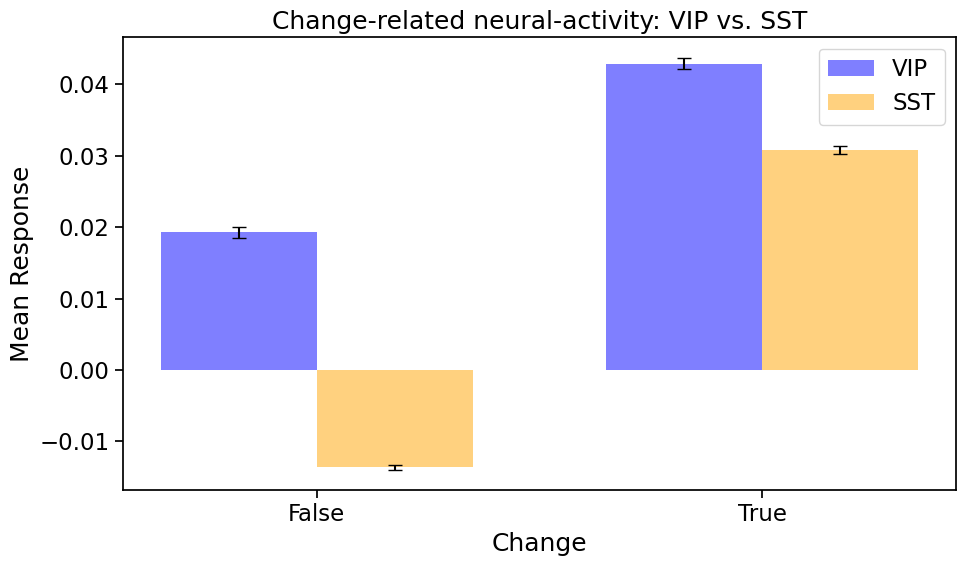

In [10]:
# visualize the change-related neural activity
plt.figure(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(change_vip['is_change']))

# vip
plt.bar(x - bar_width/2, change_vip['mean'], yerr=change_vip['sem'], 
        width=bar_width, label='VIP', color='blue', alpha=0.5, capsize=5)

# ssi
plt.bar(x + bar_width/2, change_sst['mean'], yerr=change_sst['sem'], 
        width=bar_width, label='SST', color='orange', alpha=0.5, capsize=5)

plt.xlabel('Change')
plt.ylabel('Mean Response')
plt.title('Change-related neural-activity: VIP vs. SST')
plt.xticks(x, ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()

1. VIP neurones react strongly to changes (= True) in the stimulus. Their activity increases significantly compared to conditions without change (= False). This suggests that VIP neurons play a role in the processing of stimulus changes or in the reinforcement of relevant new stimuli.
2. SST neurons show an overall weaker response, both with `is_change=False` and with `is_change=True`. A slight activation at `is_change=True` could mean that SST neurons play a regulatory role by dampening excessive excitatory activity when a stimulus change occurs.
3. VIP neurons appear to be specialised in behaviourally relevant events (e.g. reward, change), while SST neurons play a more modulating and inhibitory role.

## Do VIP and SST neurons respond differently when visual stimuli are presented versus omitted?

As we know, various images were shown to the mice in the experiment. Sometimes the pictures were also omitted in order to introduce something unexpected into the experiment and thus also to analyze the reaction of the mice.
The following analysis investigates the differences in neural activity between conditions where visual stimuli (= images) are presented and where they are omitted. 
By comparing the mean responses of VIP and SST neurons in these scenarios, we aim to explore how these populations contribute to processing visual information and managing situations where expected stimuli are absent.

For this, as a first step we need to check how many different images were shown to the mice.
Overall there are 16 different images with different themes (e. g. animal images, which we have further analyzed in another notebook) and in severall cases the images where omitted.

In [12]:
# check how many different images there are
data["image_name"].value_counts()

image_name
omitted    61733
im031       6781
im106       6762
im045       6752
im054       6702
im073       6661
im075       6618
im000       6615
im035       6610
im085       4154
im061       4141
im077       4096
im062       4048
im065       4038
im066       4008
im069       3988
im063       3988
Name: count, dtype: int64

In [21]:
# combine all images as a supergroup to compare them to the omitted group
vip_data['stimulus_type'] = vip_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')
sst_data['stimulus_type'] = sst_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')

C:\Users\iside\AppData\Local\Temp\ipykernel_28744\2510113263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vip_data['stimulus_type'] = vip_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')
C:\Users\iside\AppData\Local\Temp\ipykernel_28744\2510113263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_data['stimulus_type'] = sst_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')


In [19]:
# group the data by stimulus_type (image vs. omitted) and calculate the mean value, the standard deviation and the standard error
vip_summary = vip_data.groupby('stimulus_type')['mean_response'].agg(['mean', 'std', 'count']).reset_index()
vip_summary['sem'] = vip_summary['std'] / (vip_summary['count'] ** 0.5)

sst_summary = sst_data.groupby('stimulus_type')['mean_response'].agg(['mean', 'std', 'count']).reset_index()
sst_summary['sem'] = sst_summary['std'] / (sst_summary['count'] ** 0.5)


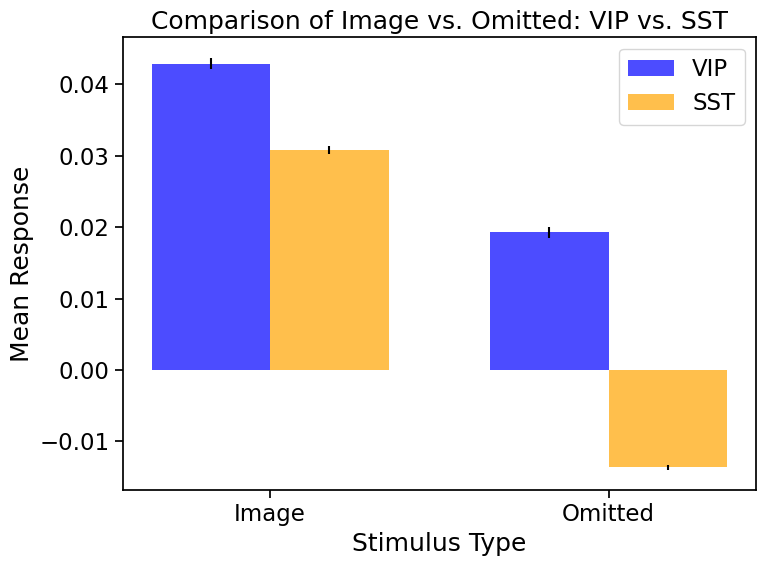

In [22]:
# plotting the comparison
x = np.arange(2) 
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, vip_summary['mean'], yerr=vip_summary['sem'], width=bar_width, label='VIP', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, sst_summary['mean'], yerr=sst_summary['sem'], width=bar_width, label='SST', color='orange', alpha=0.7)

plt.xticks(x, ['Image', 'Omitted'])
plt.xlabel('Stimulus Type')
plt.ylabel('Mean Response')
plt.title('Comparison of Image vs. Omitted: VIP vs. SST')
plt.legend()
plt.tight_layout()
plt.show()

1. VIP neurons exhibited stronger responses when images were presented compared to when stimuli were omitted. This suggests that VIP neurons are highly sensitive to visual input and are actively involved in processing stimulus-driven information.
The response decreased significantly during "omitted" trials, indicating that VIP neurons are less active when no stimulus is presented. This behavior supports the hypothesis that VIP neurons primarily amplify responses to relevant sensory inputs.
2. SST neurons showed a weaker response to visual stimuli than VIP neurons, reflecting their more modulatory or inhibitory role in the network.
During "omitted" trials, SST neurons exhibited a negative mean response, suggesting an increase in inhibitory activity when no stimulus is present. This might reflect their role in stabilizing the network and maintaining balance in the absence of sensory-driven excitation.
3. Overall, VIP neurons are stimulus-driven and enhance responses to visual input but reduce activity when no stimulus is presented.
SST neurons, in contrast, exhibit a stabilizing function, responding weakly to visual input and showing inhibitory tendencies during omitted conditions.